In [1]:
# 📌 Gerekli kütüphaneleri içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import warnings

# 📌 Uyarıları kapat
warnings.filterwarnings("ignore", category=DeprecationWarning)

print("Kütüphaneler başarıyla yüklendi.")


Kütüphaneler başarıyla yüklendi.


In [2]:
# 📌 Kaggle veri setini indir
import kagglehub  # Kaggle veri setleri için

# Veri setini indir ve yolu belirle
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")


In [3]:
# 📌 Eğitim verilerinin olduğu klasör
train_dir = os.path.join(path, "train")

# 📌 Test verilerinin bulunduğu CSV dosyası
test_file = os.path.join(path, "Test.csv")

print("Veri seti başarıyla indirildi:", path)

Veri seti başarıyla indirildi: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


Eski kodda path değişkeni kullanılmadan 'train' klasörüne erişiliyordu.

os.path.join(path, "train") kullanılarak dosya yolu düzeltildi.

In [4]:
data = []
labels = []
classes = 43

for i in range(classes):
    # 📌 Her sınıfın bulunduğu klasörü belirle
    class_dir = os.path.join(train_dir, str(i))
    images = os.listdir(class_dir)

    for img in images:
        try:
            img_path = os.path.join(class_dir, img)  # Görüntü dosyasının tam yolu
            image = Image.open(img_path)
            image = image.resize((30,30))  # Modelin giriş boyutu ile eşleştir
            data.append(np.array(image))  # Görüntüyü NumPy dizisine çevir
            labels.append(i)  # Görüntünün sınıfını kaydet
        except Exception as e:
            print(f"Error loading image {img}: {e}")

data = np.array(data)
labels = np.array(labels)

print("Veri yükleme tamamlandı. Veri şekli:", data.shape)



Veri yükleme tamamlandı. Veri şekli: (39209, 30, 30, 3)


Windows’a özel \\\\ yerine os.path.join() kullanıldı (platform bağımsız olması için).

try-except bloğu eklendi ki hata alsan bile döngü devam etsin.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print("Veri bölme tamamlandı. Eğitim veri şekli:", X_train.shape)



Veri bölme tamamlandı. Eğitim veri şekli: (31367, 30, 30, 3)


Eğitim ve test veri kümelerini belirliyoruz.

to_categorical() kullanılarak etiketler one-hot encoding formatına dönüştürüldü.

In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(43, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

model.save("Trafic_signs_model.h5")

print("Model eğitimi tamamlandı ve kaydedildi.")


Epoch 1/2
981/981 ━━━━━━━━━━━━━━━━━━━━ 144s 142ms/step - accuracy: 0.3050 - loss: 3.3481 - val_accuracy: 0.8653 - val_loss: 0.5223
Epoch 2/2
981/981 ━━━━━━━━━━━━━━━━━━━━ 133s 136ms/step - accuracy: 0.7894 - loss: 0.7246 - val_accuracy: 0.9609 - val_loss: 0.1603


Model eğitimi tamamlandı ve kaydedildi.


epoch=2
Model eğitimi bittikten sonra kaydediliyor.

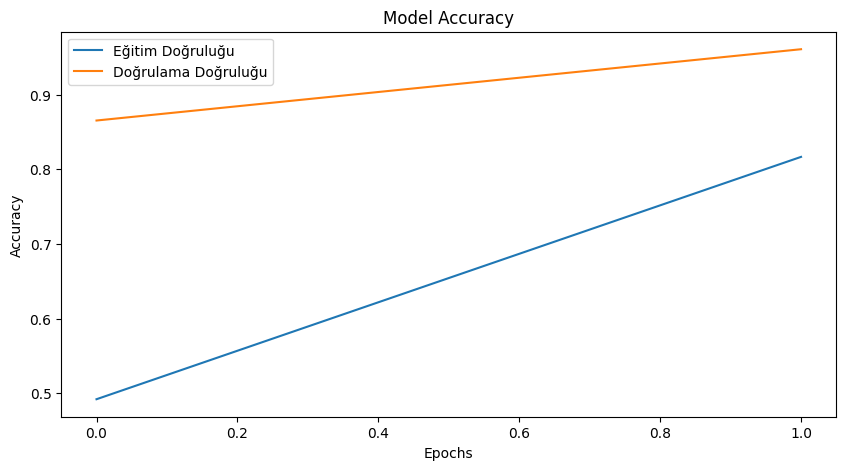

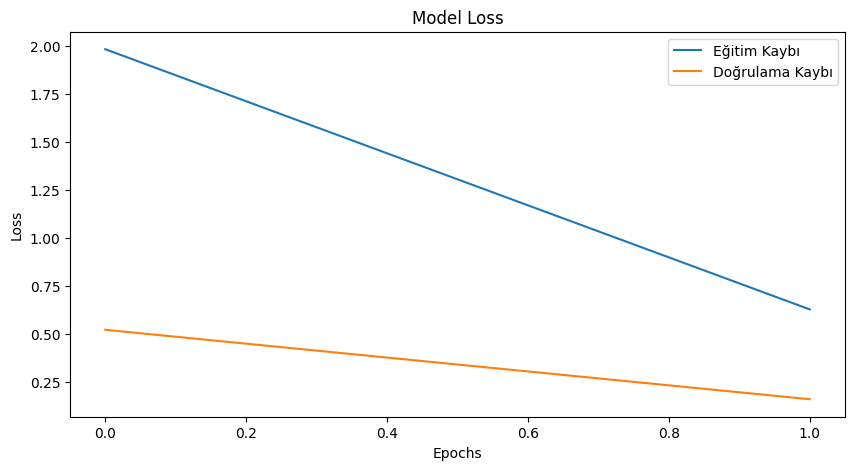

In [8]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


 Modelin Performansını Görselleştirme

In [9]:
y_test_df = pd.read_csv(test_file)

labels = y_test_df["ClassId"].values
imgs = y_test_df["Path"].values

test_data = []
for img in imgs:
    img_path = os.path.join(path, img)
    image = Image.open(img_path)
    image = image.resize((30,30))
    test_data.append(np.array(image))

X_test = np.array(test_data)

pred = np.argmax(model.predict(X_test), axis=1)

from sklearn.metrics import accuracy_score
print("Model Accuracy on Test Data:", accuracy_score(labels, pred))


395/395 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step
Model Accuracy on Test Data: 0.9166270783847981


Modelin Test Verisi Üzerinde Tahmin Yapması

model.predict_classes() yerine np.argmax(model.predict(), axis=1) kullanıldı

Saving 00009.png to 00009 (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Tahmin Edilen Sınıf: Ahead only
Olasılık: 1.0000


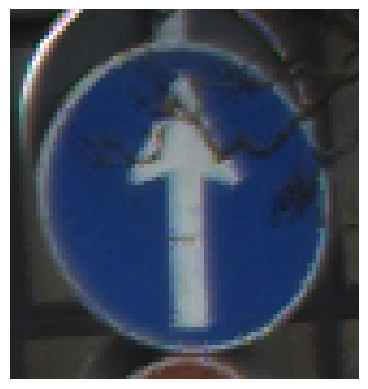

('Ahead only', 0.9999999)

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

#Eğitilmiş modeli yükle
model = load_model('Trafic_signs_model.h5')

classes = {
    1:'Speed limit (20km/h)',
    2:'Speed limit (30km/h)',
    3:'Speed limit (50km/h)',
    4:'Speed limit (60km/h)',
    5:'Speed limit (70km/h)',
    6:'Speed limit (80km/h)',
    7:'End of speed limit (80km/h)',
    8:'Speed limit (100km/h)',
    9:'Speed limit (120km/h)',
    10:'No passing',
    11:'No passing veh over 3.5 tons',
    12:'Right-of-way at intersection',
    13:'Priority road',
    14:'Yield',
    15:'Stop',
    16:'No vehicles',
    17:'Veh > 3.5 tons prohibited',
    18:'No entry',
    19:'General caution',
    20:'Dangerous curve left',
    21:'Dangerous curve right',
    22:'Double curve',
    23:'Bumpy road',
    24:'Slippery road',
    25:'Road narrows on the right',
    26:'Road work',
    27:'Traffic signals',
    28:'Pedestrians',
    29:'Children crossing',
    30:'Bicycles crossing',
    31:'Beware of ice/snow',
    32:'Wild animals crossing',
    33:'End speed + passing limits',
    34:'Turn right ahead',
    35:'Turn left ahead',
    36:'Ahead only',
    37:'Go straight or right',
    38:'Go straight or left',
    39:'Keep right',
    40:'Keep left',
    41:'Roundabout mandatory',
    42:'End of no passing',
    43:'End no passing veh > 3.5 tons'
}

def predict_traffic_sign(file_path):
    try:
        # Görseli aç ve uygun boyuta getir
        image = Image.open(file_path)
        image = image.resize((30, 30))
        image = np.array(image)

        # Modelin girdi formatına uygun hale getir
        image = np.expand_dims(image, axis=0)  # (1, 30, 30, 3) şekline getirir
        '''
        image = image / 255.0  # Normalizasyon
        '''
        # Model ile tahmin yap
        predictions = model.predict(image)
        predicted_class = np.argmax(predictions) + 1  # En yüksek olasılığa sahip sınıfı al
        confidence = np.max(predictions)  # Olasılık değeri

        print(f"Tahmin Edilen Sınıf: {classes[predicted_class]}")
        print(f"Olasılık: {confidence:.4f}")

        plt.imshow(Image.open(file_path))
        plt.axis('off')
        plt.show()

        return classes[predicted_class], confidence
    except Exception as e:
        print(f"Hata oluştu: {e}")
        return None, None

# Kullanıcının görsel yüklemesi için
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # Yüklenen ilk dosyanın adını al
predict_traffic_sign(file_path)

